In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("hour.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
data.sum()

instant                                               151023510
dteday        2011-01-012011-01-012011-01-012011-01-012011-0...
season                                                    43476
yr                                                         8734
mnth                                                     113620
hr                                                       200671
holiday                                                     500
weekday                                                   52201
workingday                                                11865
weathersit                                                24770
temp                                                    8637.14
atemp                                                 8268.4955
hum                                                    10900.61
windspeed                                             3303.7063
casual                                                   620017
registered                              

In [ ]:
data.shape

(17379, 17)

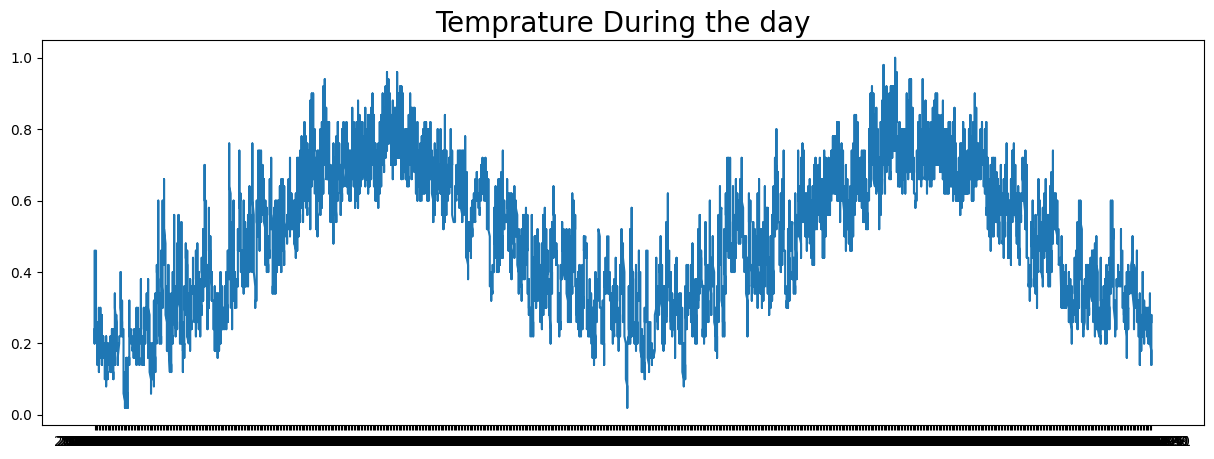

In [ ]:
date = data['dteday'].values
temp = data['temp'].values

plt.figure(figsize=(15, 5))
plt.plot(date, temp)
plt.title('Temprature During the day',
          fontsize=20);

In [ ]:
from sklearn.model_selection import train_test_split

train_size = int(len(data) * 0.8)
train, test = data.iloc[0:train_size], data.iloc[train_size:len(data)]

print(train.shape, test.shape)

(13903, 17) (3476, 17)


In [ ]:
scaler = MinMaxScaler()

train_scale = scaler.fit_transform(train['cnt'].values.reshape(-1, 1))
test_scale = scaler.fit_transform(test['cnt'].values.reshape(-1, 1))


In [ ]:
split=int((1-0.2)*len(data))

date_train = data.index[:split]
date_test = data.index[split:]

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
look_back = 20
train_gen = TimeseriesGenerator(train_scale, train_scale, length=look_back, batch_size=20)     
test_gen = TimeseriesGenerator(test_scale, test_scale, length=look_back, batch_size=1)

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [37]:
class my_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < 0.1):
          self.model.stop_training = True
          print(" MAE telah mencapai dibawah 10%")

    def on_train_end(self, epoch, logs={}):
        print('Done')

callbacks = my_callback()

In [42]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_gen,epochs=30,
                    callbacks = callbacks,
                    shuffle=False)

Epoch 1/30
695/695 [==============================] - 31s 39ms/step - loss: 0.0125 - mae: 0.1209
Epoch 2/30
695/695 [==============================] - 28s 40ms/step - loss: 0.0120 - mae: 0.1195
Epoch 3/30
695/695 [==============================] - 27s 39ms/step - loss: 0.0114 - mae: 0.1148
Epoch 4/30
695/695 [==============================] - 27s 39ms/step - loss: 0.0107 - mae: 0.1103
Epoch 5/30
695/695 [==============================] - 28s 40ms/step - loss: 0.0103 - mae: 0.1078
Epoch 6/30
695/695 [==============================] - 27s 39ms/step - loss: 0.0096 - mae: 0.1041
Epoch 7/30
695/695 [==============================] - 27s 39ms/step - loss: 0.0093 - mae: 0.1024
Epoch 8/30
695/695 [==============================] - 27s 39ms/step - loss: 0.0088 - mae: 0.0993
Done
